In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'vel_data_40kms.nc')

ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vs'] = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'].copy()
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp.to_netcdf('/scratch2/shreyas/GrIS_paleo_data/fake_vel_data_40kms.nc', mode='w')

/scratch2/shreyas/mambaforge/envs/py310_LRP/lib/python3.10/site-packages/xarray/core/computation.py:818: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/scratch2/shreyas/mambaforge/envs/py310_LRP/lib/python3.10/site-packages/xarray/core/computation.py:818: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))


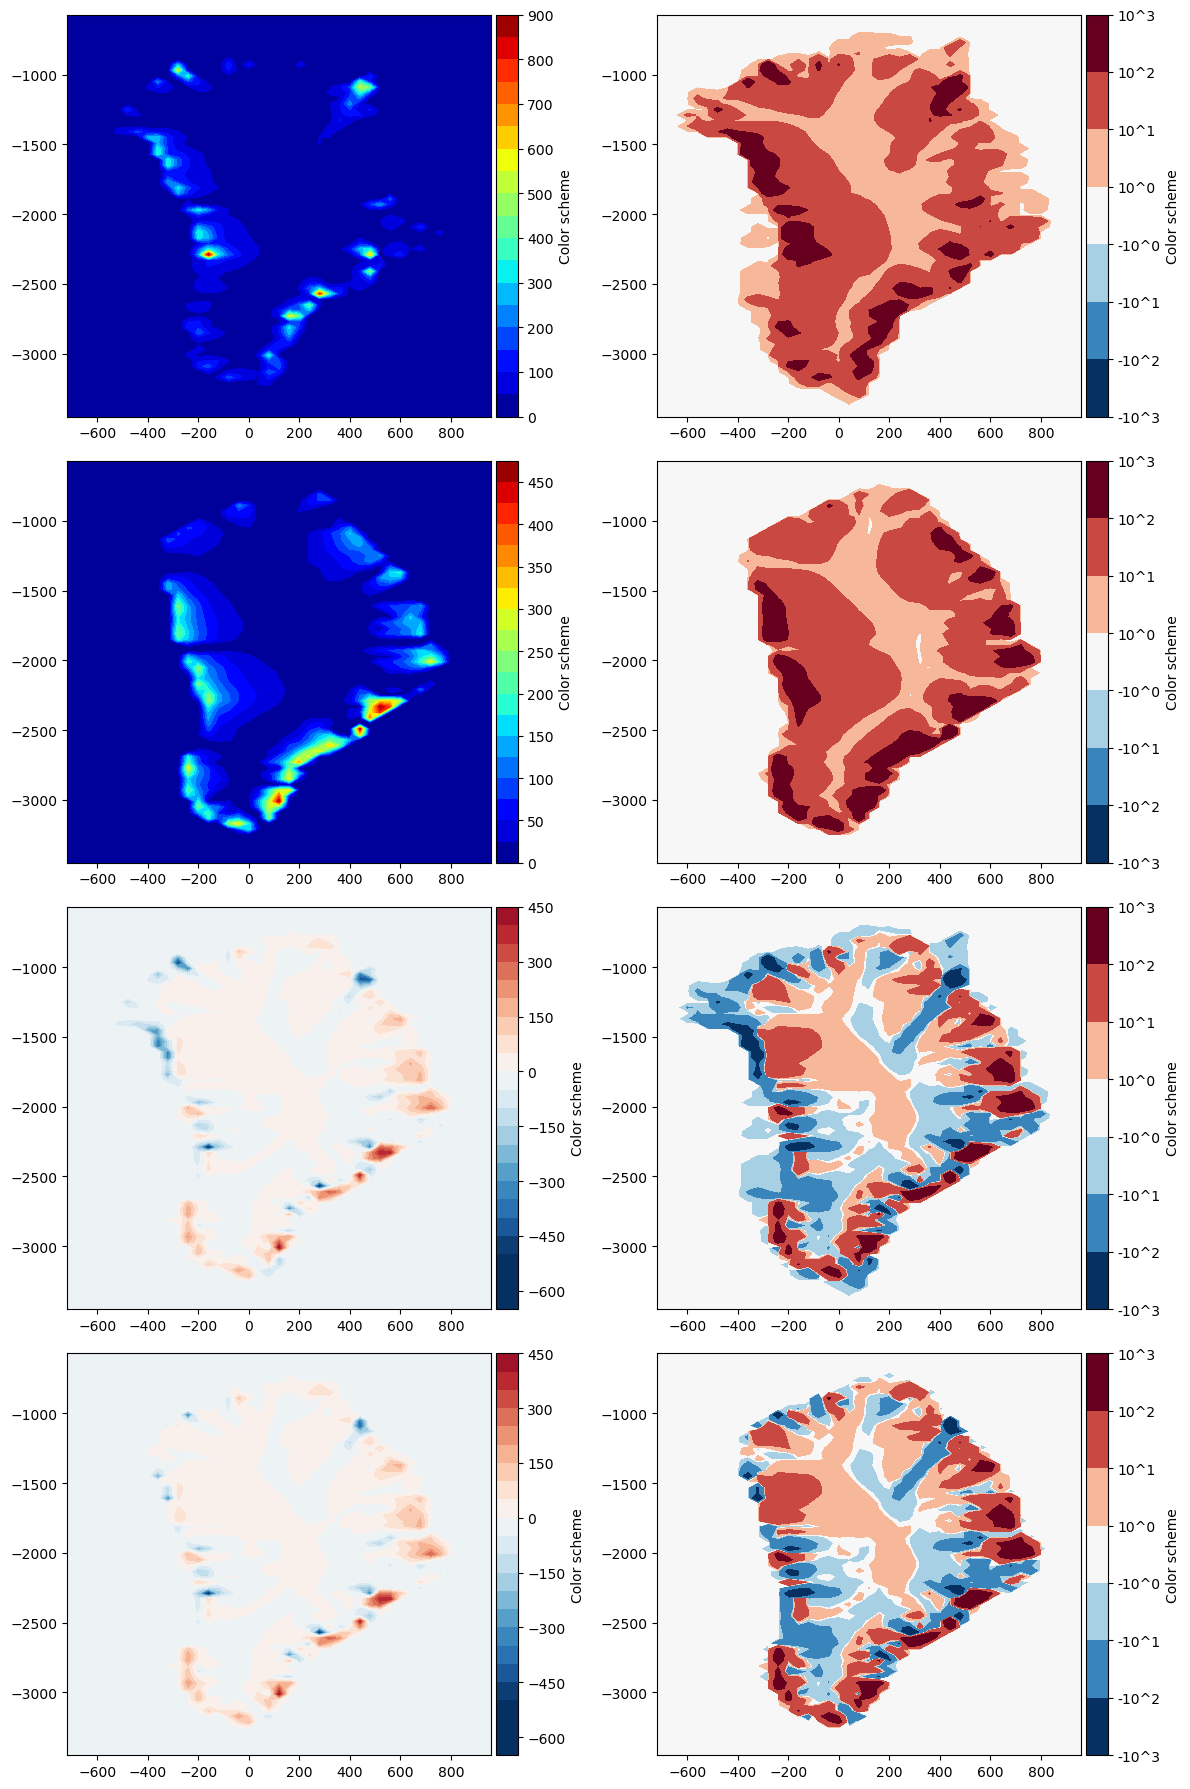

In [3]:
plt.rcParams["figure.figsize"] = (12,18)
fig, ax = plt.subplots(4,2)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         ds_surfvel_data_40km['vs'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      ds_surfvel_data_40km['vs'],
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_log(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                      ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                      ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'],
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[1, 1])

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'].data - ds_surfvel_data_40km['vs'].data,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 20, fig = fig, ax = ax[2, 0])

fancyPlotter.plot_log(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                      ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                      ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'].data - ds_surfvel_data_40km['vs'].data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[2, 1])

mask = (ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'] > 0).data
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                         (ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'].data - ds_surfvel_data_40km['vs'].data)*mask,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 20, fig = fig, ax = ax[3, 0])

fancyPlotter.plot_log(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000, 
                      ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000, 
                      (ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['vh_s'].data - ds_surfvel_data_40km['vs'].data)*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[3, 1])

plt.tight_layout()